In [3]:
import pandas as pd
import numpy as np
from  sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import phenograph
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
data_dir = "/home/ucsd-train13/scratch/projects/rnaSeqAnalysis/"

In [5]:
zscore_variable_genes = pd.read_csv(data_dir+"tpm_all_vg_0.02_zscores.csv", index_col=0)
print(zscore_variable_genes.shape)
zscore_variable_genes.head()

(3104, 2065)


,2,3,4,5,6,7,8,9,10,11,...,2057,2058,2059,2060,2061,2062,2063,2064,2065,2066
0,,,,,,,,,,,,,,,,,,,,,
ENSG00000105976.14,-0.414604,0.309817,-0.414604,-0.414604,-0.414604,0.003446,-0.414604,0.492121,-0.414604,-0.414604,...,-0.414604,-0.414604,-0.414604,-0.414604,-0.414604,3.069944,-0.414604,-0.414604,-0.414604,-0.414604
ENSG00000130827.6,-0.100658,-0.100658,-0.100658,-0.100658,-0.100658,-0.100658,-0.100658,-0.100658,-0.100658,-0.100658,...,-0.100658,-0.100658,-0.100658,-0.100658,-0.100658,-0.100658,-0.100658,-0.100658,-0.100658,-0.100658
ENSG00000187123.14,-0.113256,-0.113256,-0.113256,1.290514,-0.113256,-0.113256,-0.113256,-0.113256,-0.113256,-0.113256,...,-0.113256,-0.113256,-0.113256,-0.113256,-0.113256,-0.113256,-0.113256,-0.113256,-0.113256,-0.113256
ENSG00000099875.14,-0.155250,-0.398357,-0.398357,-0.398357,-0.398357,0.442258,-0.398357,0.969075,0.527206,0.083763,...,-0.398357,-0.398357,-0.398357,-0.398357,-0.398357,-0.398357,-0.398357,-0.398357,-0.398357,-0.398357
ENSG00000272398.5,-0.021335,0.214696,-0.246156,-0.495321,1.401098,0.597311,0.330213,-0.199089,-0.194559,-0.181991,...,-0.495321,-0.495321,-0.495321,-0.495321,-0.495321,1.781518,-0.495321,-0.495321,-0.495321,-0.495321


In [6]:
#Initiate a PCA object to be calculated with 300 components. 
pca = PCA(n_components=300)

#Fit our data with this PCA and save the result. PCA requires the samples (cells) to be the rows of the dataframe and 
#the measurements (genes) to be the columns. So we are going to transpose our dataframe with .T
pca_result = pca.fit_transform(zscore_variable_genes.T)

In [7]:
#The explained variance ratio will tell you how much of the variation in the dataset was captured by each component. 
#Notice there are 300 values in this array, that is because we kept 300 components.
#PCs are in decreasing order

pca.explained_variance_ratio_

array([0.01287233, 0.00856292, 0.00545669, 0.0043002 , 0.00384039,
       0.00327885, 0.00292999, 0.00259429, 0.00242469, 0.00232753,
       0.00224089, 0.00217519, 0.00210201, 0.00207837, 0.00204391,
       0.00201274, 0.00197399, 0.00197129, 0.0019534 , 0.00193752,
       0.00190342, 0.0019008 , 0.00187871, 0.00186214, 0.00186082,
       0.00185223, 0.00184015, 0.0018313 , 0.00182609, 0.00181888,
       0.00181462, 0.00180419, 0.0017958 , 0.00178979, 0.00178464,
       0.00177317, 0.00176745, 0.00176614, 0.00175447, 0.00174813,
       0.0017398 , 0.0017349 , 0.00173324, 0.0017274 , 0.00171869,
       0.00171547, 0.00171308, 0.00170658, 0.00169456, 0.00169042,
       0.00168636, 0.00168083, 0.00167568, 0.00167194, 0.00166261,
       0.00165543, 0.00165161, 0.00164547, 0.00164169, 0.00163308,
       0.00162411, 0.00162232, 0.00161819, 0.00161744, 0.00161253,
       0.00161103, 0.00160766, 0.00160082, 0.0015948 , 0.00158624,
       0.00158113, 0.00157657, 0.00157324, 0.00157004, 0.00156

In [8]:
#look at the cumulative sum to see how many components we need to reach 100% (ish) of the variation captured

np.cumsum(pca.explained_variance_ratio_)

array([0.01287233, 0.02143525, 0.02689194, 0.03119214, 0.03503253,
       0.03831138, 0.04124137, 0.04383565, 0.04626035, 0.04858788,
       0.05082877, 0.05300395, 0.05510596, 0.05718433, 0.05922824,
       0.06124097, 0.06321496, 0.06518625, 0.06713964, 0.06907716,
       0.07098059, 0.07288139, 0.0747601 , 0.07662224, 0.07848305,
       0.08033529, 0.08217544, 0.08400674, 0.08583284, 0.08765171,
       0.08946633, 0.09127052, 0.09306632, 0.09485611, 0.09664074,
       0.09841392, 0.10018137, 0.10194751, 0.10370198, 0.10545011,
       0.10718991, 0.10892481, 0.11065805, 0.11238546, 0.11410415,
       0.11581962, 0.1175327 , 0.11923928, 0.12093384, 0.12262426,
       0.12431061, 0.12599144, 0.12766712, 0.12933906, 0.13100167,
       0.1326571 , 0.1343087 , 0.13595417, 0.13759586, 0.13922894,
       0.14085305, 0.14247537, 0.14409356, 0.145711  , 0.14732353,
       0.14893457, 0.15054222, 0.15214304, 0.15373784, 0.15532408,
       0.15690521, 0.15848178, 0.16005502, 0.16162506, 0.16318

Text(0,0.5,'cumulative explained variance')

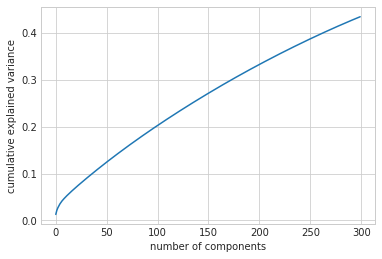

In [9]:
#make kneeplot to see where cumulative PCs form a knee 
sns.set_style("whitegrid")
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

(0, 0.14)

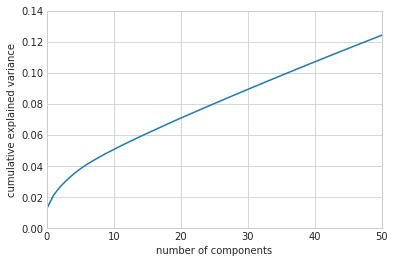

In [10]:
#change axis limits to zoom in on "knee"
sns.set_style("whitegrid")
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.xlim([0,50])
plt.ylim([0,0.14])

In [11]:
pca_df = pd.DataFrame(pca_result)
pca_df.index = zscore_variable_genes.columns
print(pca_df.shape)
pca_df.head()

(2065, 300)


,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
2,3.820931,-9.864507,3.979036,2.006340,-0.702080,-1.384471,-0.248437,-0.606213,0.157935,0.555933,...,-0.566017,-0.185472,0.638173,-0.395705,0.826702,0.234827,-0.788471,0.316124,-0.876402,0.165532
3,-1.142266,-3.774537,1.647914,-1.609294,-1.003395,-0.149751,3.308973,-3.016223,0.902138,0.041960,...,0.145282,0.192310,-0.260262,-0.121023,0.114798,-0.141049,-0.484735,0.150102,0.538923,0.640405
4,-13.105093,-0.317747,8.674982,-1.526576,-4.191440,2.203475,-1.162951,-0.953532,0.542573,3.692506,...,-0.364024,-0.027777,-0.272982,0.576533,0.651846,0.476521,-0.447924,-0.026107,-0.105495,0.018517
5,-0.087282,-5.690901,-2.669086,-1.185346,-2.146874,0.572260,2.795837,-0.737124,0.581984,1.232778,...,-0.108503,-0.378936,0.161649,-0.052253,0.224710,-0.172604,0.413759,0.546664,0.565425,0.596377
6,-9.363459,-2.651799,3.294571,-2.140065,0.095419,-2.340688,1.140487,-2.999154,0.362467,0.611049,...,-0.041396,-0.545628,-0.515488,0.244046,-0.109305,-0.936104,-0.268450,0.150986,0.146451,0.514090


In [12]:
subset_PCA = pca_df[[0, 1]]
subset_PCA.head()

,0,1
2,3.820931,-9.864507
3,-1.142266,-3.774537
4,-13.105093,-0.317747
5,-0.087282,-5.690901
6,-9.363459,-2.651799


In [13]:
sns.set_style('white')

g = sns.lmplot('x', 'y', subset_PCA, fit_reg=False, 
              scatter_kws={"s":25}, size=8)
#we got PCAs we can use for clustering, but they are not very good for visualization

KeyError: "['x' 'y'] not in index"

In [14]:
pca_df.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
2,3.820931,-9.864507,3.979036,2.006340,-0.702080,-1.384471,-0.248437,-0.606213,0.157935,0.555933,...,-0.566017,-0.185472,0.638173,-0.395705,0.826702,0.234827,-0.788471,0.316124,-0.876402,0.165532
3,-1.142266,-3.774537,1.647914,-1.609294,-1.003395,-0.149751,3.308973,-3.016223,0.902138,0.041960,...,0.145282,0.192310,-0.260262,-0.121023,0.114798,-0.141049,-0.484735,0.150102,0.538923,0.640405
4,-13.105093,-0.317747,8.674982,-1.526576,-4.191440,2.203475,-1.162951,-0.953532,0.542573,3.692506,...,-0.364024,-0.027777,-0.272982,0.576533,0.651846,0.476521,-0.447924,-0.026107,-0.105495,0.018517
5,-0.087282,-5.690901,-2.669086,-1.185346,-2.146874,0.572260,2.795837,-0.737124,0.581984,1.232778,...,-0.108503,-0.378936,0.161649,-0.052253,0.224710,-0.172604,0.413759,0.546664,0.565425,0.596377
6,-9.363459,-2.651799,3.294571,-2.140065,0.095419,-2.340688,1.140487,-2.999154,0.362467,0.611049,...,-0.041396,-0.545628,-0.515488,0.244046,-0.109305,-0.936104,-0.268450,0.150986,0.146451,0.514090


In [15]:
pca_df[pca_df.columns[:13]].head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
2,3.820931,-9.864507,3.979036,2.006340,-0.702080,-1.384471,-0.248437,-0.606213,0.157935,0.555933,-0.804340,0.152668,-0.473288
3,-1.142266,-3.774537,1.647914,-1.609294,-1.003395,-0.149751,3.308973,-3.016223,0.902138,0.041960,-0.867419,0.382978,-0.763184
4,-13.105093,-0.317747,8.674982,-1.526576,-4.191440,2.203475,-1.162951,-0.953532,0.542573,3.692506,4.157664,-0.853330,-0.688433
5,-0.087282,-5.690901,-2.669086,-1.185346,-2.146874,0.572260,2.795837,-0.737124,0.581984,1.232778,1.422432,-0.571212,1.042997
6,-9.363459,-2.651799,3.294571,-2.140065,0.095419,-2.340688,1.140487,-2.999154,0.362467,0.611049,0.333956,0.019796,0.611141


In [16]:
num_PCA_components_to_keep = 5

cols = list(range(num_PCA_components_to_keep))
subset = pca_df[cols]
print(subset.shape)
subset.head()
#to make subsetted dataframe that only contains the first 15 columns 

(2065, 5)


,0,1,2,3,4
2,3.820931,-9.864507,3.979036,2.006340,-0.702080
3,-1.142266,-3.774537,1.647914,-1.609294,-1.003395
4,-13.105093,-0.317747,8.674982,-1.526576,-4.191440
5,-0.087282,-5.690901,-2.669086,-1.185346,-2.146874
6,-9.363459,-2.651799,3.294571,-2.140065,0.095419


In [17]:
communities_50, sparse_matrix50, Q50 = phenograph.cluster(subset, k=50)

Finding 50 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.1425635814666748 seconds
Jaccard graph constructed in 1.07016921043396 seconds
Wrote graph to binary file in 0.28269457817077637 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.674643
After 4 runs, maximum modularity is Q = 0.677505
Louvain completed 24 runs in 2.7186684608459473 seconds
PhenoGraph complete in 4.251134872436523 seconds


In [18]:
communities_100, sparse_matrix100, Q100 = phenograph.cluster(subset, k=100)

Finding 100 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.2318251132965088 seconds
Jaccard graph constructed in 2.2787532806396484 seconds
Wrote graph to binary file in 0.46112775802612305 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.619975
After 7 runs, maximum modularity is Q = 0.622516
After 9 runs, maximum modularity is Q = 0.623681
Louvain completed 29 runs in 4.6914379596710205 seconds
PhenoGraph complete in 7.724484443664551 seconds


In [19]:
communities_200, sparse_matrix200, Q200 = phenograph.cluster(subset, k=200)

Finding 200 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.24799418449401855 seconds
Jaccard graph constructed in 6.391039848327637 seconds
Wrote graph to binary file in 0.9737660884857178 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.547424
Louvain completed 21 runs in 4.652035236358643 seconds
PhenoGraph complete in 12.336881160736084 seconds


In [20]:
communities_500, sparse_matrix500, Q500 = phenograph.cluster(subset, k=500)

Finding 500 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.5435173511505127 seconds
Jaccard graph constructed in 34.94543194770813 seconds
Wrote graph to binary file in 2.394946813583374 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.423817
After 2 runs, maximum modularity is Q = 0.430372
Louvain completed 22 runs in 7.819118976593018 seconds
PhenoGraph complete in 45.877225160598755 seconds


In [21]:
communities_20, sparse_matrix20, Q20 = phenograph.cluster(subset, k=20)

Finding 20 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.11689138412475586 seconds
Jaccard graph constructed in 0.6512863636016846 seconds
Wrote graph to binary file in 0.19164133071899414 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.757439
After 8 runs, maximum modularity is Q = 0.759967
Louvain completed 28 runs in 2.046436309814453 seconds
PhenoGraph complete in 3.025740623474121 seconds


In [22]:
len(communities_20)

2065

In [23]:
len(communities_50)

2065

In [24]:
Q50

0.677505

In [25]:
Q20

0.759967

In [26]:
tsne_LR50 = TSNE(n_components=2, verbose=1, perplexity=50,
            n_iter=1000, learning_rate = 50)
tsne_pca_LR50 = tsne_LR50.fit_transform(subset)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 2065 samples in 0.003s...
[t-SNE] Computed neighbors for 2065 samples in 0.215s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2065
[t-SNE] Computed conditional probabilities for sample 2000 / 2065
[t-SNE] Computed conditional probabilities for sample 2065 / 2065
[t-SNE] Mean sigma: 2.589063
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.379776
[t-SNE] Error after 1000 iterations: 1.236539


In [27]:
#make communities dictionary
names = ["community_500", "community_200", "community_100", "community_50", "community_20"]
arrays = [communities_500, communities_200, communities_100, communities_50, communities_20]
community_dict = dict(zip(names, arrays))
community_dict

{'community_500': array([0, 1, 3, ..., 1, 3, 2]),
 'community_200': array([0, 0, 4, ..., 2, 2, 2]),
 'community_100': array([0, 7, 4, ..., 1, 1, 1]),
 'community_50': array([4, 0, 5, ..., 1, 1, 1]),
 'community_20': array([ 0,  2, 11, ...,  9,  9,  1])}

In [31]:
#function to make tSNE based on several input parameters:
def make_tSNE(subset, perplexity, learning_rate, community_assignments_dict):
    tsne = TSNE(n_components=2, verbose=1, perplexity=perplexity,
               n_iter=1000, learning_rate=learning_rate)
    tsne_pca = tsne.fit_transform(subset)
    df = pd.DataFrame(tsne_pca, index = subset.index)
    df.rename(columns = {0:'x',1:'y'}, inplace=True)
    for key in community_assignments_dict.keys():
        df[key]=community_assignments_dict[key]
    return df

In [32]:
#call the function
tsne_pl10_lr200_comp20 = make_tSNE(pca_df, 10, 200, community_dict, 20)

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 2065 samples in 0.005s...
[t-SNE] Computed neighbors for 2065 samples in 0.363s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2065
[t-SNE] Computed conditional probabilities for sample 2000 / 2065
[t-SNE] Computed conditional probabilities for sample 2065 / 2065
[t-SNE] Mean sigma: 2.706667
[t-SNE] KL divergence after 250 iterations with early exaggeration: 86.069122
[t-SNE] Error after 1000 iterations: 1.998495


In [32]:
df_tsne_pca = pd.DataFrame(tsne_pca, index = subset.index)
df_tsne_pca.rename(columns = {0:'x',1:'y'}, inplace=True)
df_tsne_pca['community_500'] = communities_500
df_tsne_pca['community_200'] = communities_200
df_tsne_pca['community_100'] = communities_100
df_tsne_pca['community_50'] = communities_50
df_tsne_pca['community_20'] = communities_20

In [1]:
df_tsne_pca.head()

NameError: name 'df_tsne_pca' is not defined

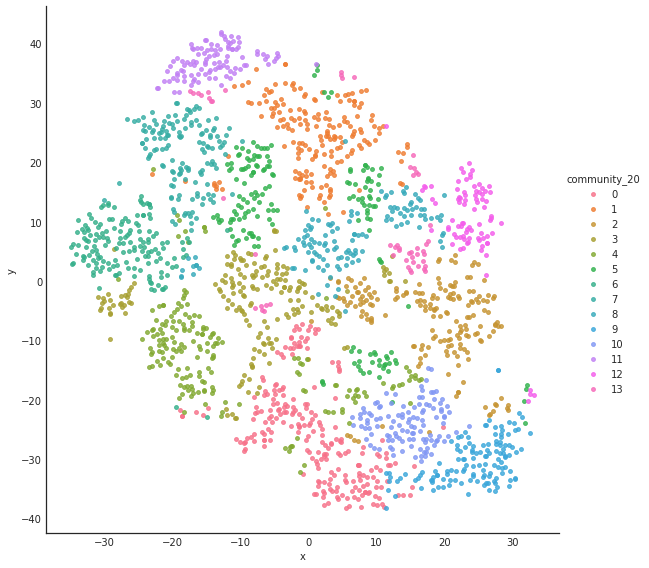

In [33]:
sns.set_style('white')

g = sns.lmplot('x', 'y', df_tsne_pca, hue='community_20', fit_reg=False, 
              scatter_kws={"s":15}, size=8)

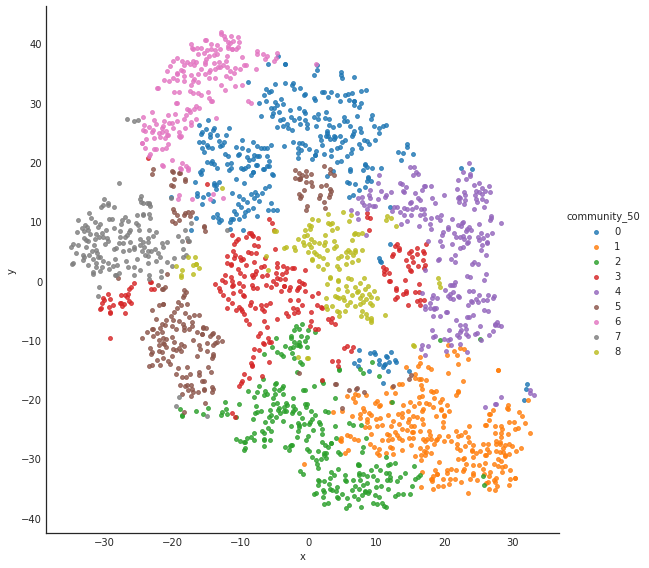

In [34]:
sns.set_style('white')

g = sns.lmplot('x', 'y', df_tsne_pca, hue='community_50', fit_reg=False, 
              scatter_kws={"s":15}, size=8)

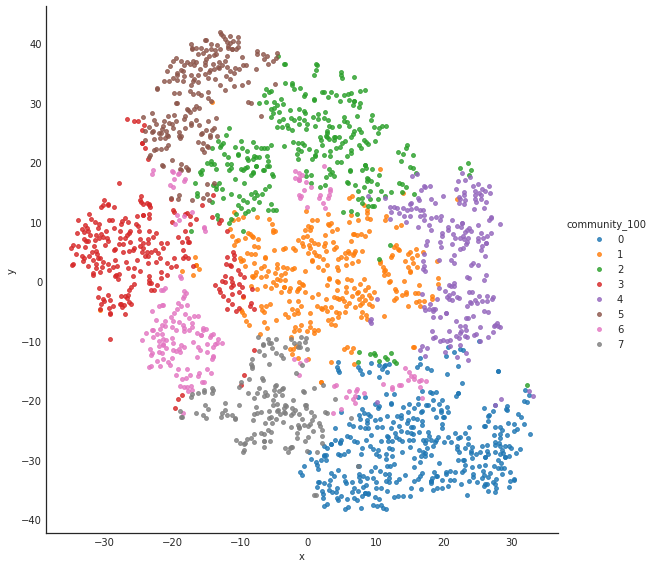

In [35]:
sns.set_style('white')

g = sns.lmplot('x', 'y', df_tsne_pca, hue='community_100', fit_reg=False, 
              scatter_kws={"s":15}, size=8)

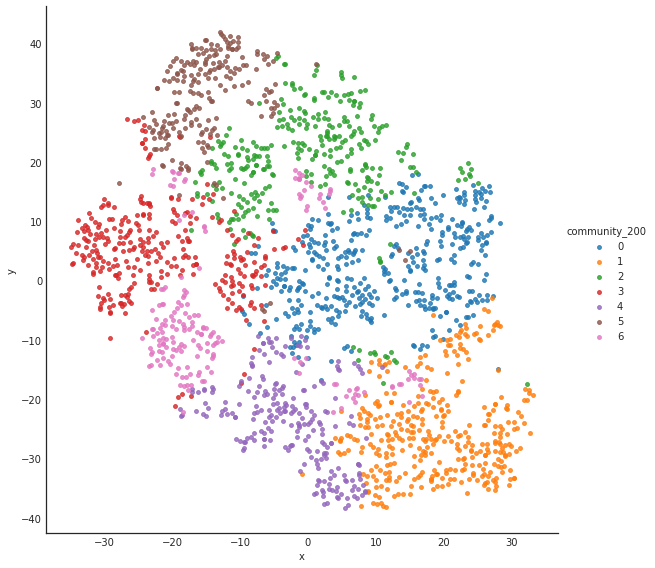

In [36]:
sns.set_style('white')

g = sns.lmplot('x', 'y', df_tsne_pca, hue='community_200', fit_reg=False, 
              scatter_kws={"s":15}, size=8)

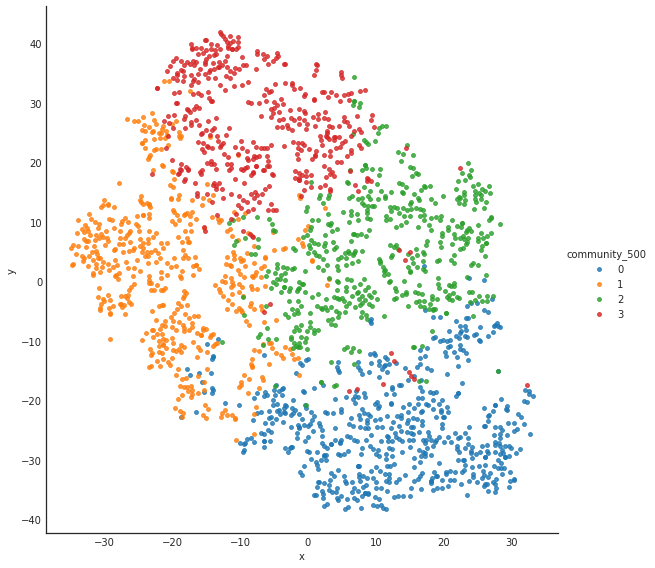

In [37]:
sns.set_style('white')

g = sns.lmplot('x', 'y', df_tsne_pca, hue='community_500', fit_reg=False, 
              scatter_kws={"s":15}, size=8)